In [1]:
from train import get_loaders
import yaml

In [2]:
with open('training_configs/dataset/eyes_simclr.yaml') as f:
    dl_cfg = yaml.safe_load(f)

In [3]:
dl_cfg['train_test_split_kwargs']={'volumes_limit':5}

In [4]:
loaders = get_loaders(**dl_cfg)

>>>>>>>>>>>>>>>> loading datasets
<<<<<<<<<<<<<<<< done in 0.51 sec.


In [5]:
imgs = loaders[0].__iter__().__next__()[0]

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
imgs.shape

torch.Size([32, 1, 256, 256])

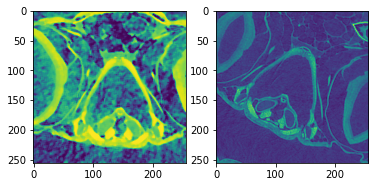

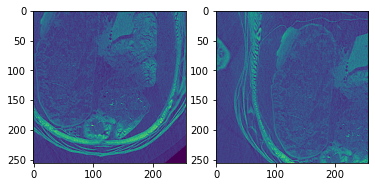

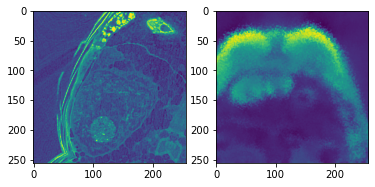

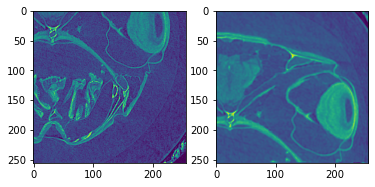

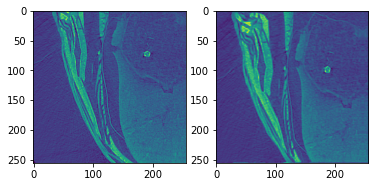

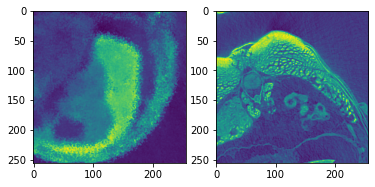

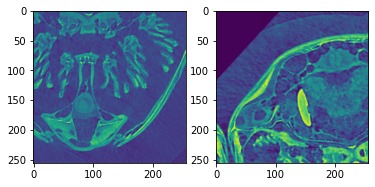

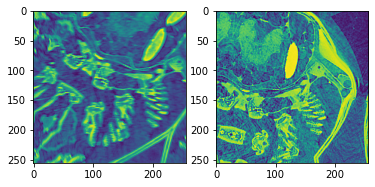

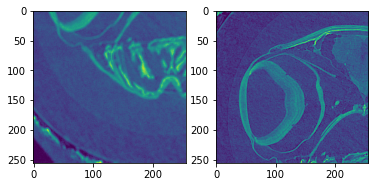

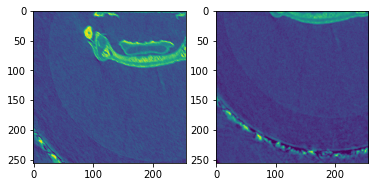

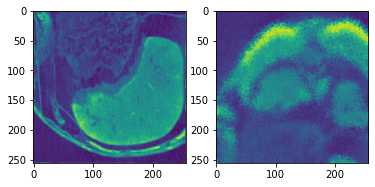

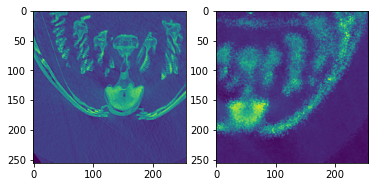

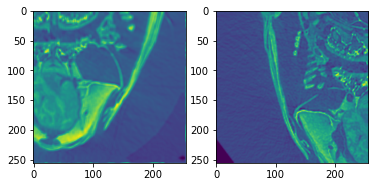

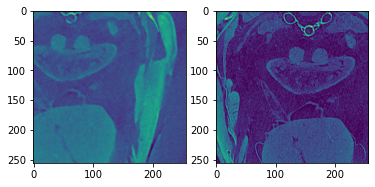

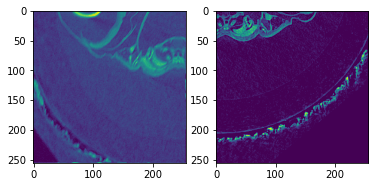

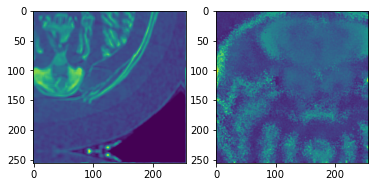

In [8]:
for i in range(len(imgs)//2):
    fig, axes = plt.subplots(ncols=2)
    axes[0].imshow(imgs[i*2][0].detach().cpu().numpy())
    axes[1].imshow(imgs[i*2+1][0].detach().cpu().numpy())
    plt.show()

In [9]:
from train import get_model

In [10]:
with open('training_configs/model/eyes_simclr.yaml') as f:
    md_cfg = yaml.safe_load(f)

In [11]:
model = get_model(**md_cfg)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 11302080
<<<<<<<<<<<<<<<< done in 0.18 sec.


In [12]:
embeddings = model(imgs)

In [13]:
embeddings.shape

torch.Size([32, 256])

In [14]:
from src.losses import ContrastiveWrapper

In [15]:
criterion = ContrastiveWrapper(n_views=2)

In [16]:
loss = criterion(embeddings)

In [17]:
loss

tensor(10.5569, grad_fn=<MeanBackward0>)

In [18]:
from TVSD import VolumeSlicingDataset

In [19]:
ds = VolumeSlicingDataset('/mnt/data/machine-learning/workshop_markup/workshop_markup/workshop_markup/proper_images/1092.tif')